
Shortcoming of Linear Regrssion

<p align="center">
  <img src="../markdown-images/linear_reg_shortcoming.png" width="700">
</p>



#### Logistic regression

The goal of binary logistic regression is to train a classifier that can make a binary decision about the class of a new input observation. Here the **sigmoid** classifier is introduced to help us make this decision.

Consider a single input observation $x$, which we will represent by a vector of feautres $[x_1, x_2, ...,x_n]$. The classifier output $y$ can be 1 (meaning the observation is the member of the class) or 0(the observation is not a memeber of the class). We want to know the probability $P(y=1|x)$ that this observation is a member of the class.

Logistic regression solves this task by learning, from a training set, a vector of **weights** and a **bias** term. Each weight is $w_i$ is a real number, and is associated with one of the input features $x_i$. 

To make a decision on a test instance, after we've learned the weights in training the classifier first multiplies each $x_i$ by its weight $w_i$, sums up the weighted features, and adds the bias term $b$. The resulting single number $z$ expresses the weighted sum of the evidence for the class. <br/>

$z = (\sum_{i=1}^{n}w_i x_i) + b$ <br/>

$z = w.x + b$

**Sigmoid function**

The sigmoid function $\sigma(z) = \frac{1}{1+e^{-z}}$ takes a real value number and maps it to the ragne $[0,1]$. <br/>

<p align="center">
  <img src="../markdown-images/sigmoid.png" width="700">
</p>

To create a probability, we'll pass $z$ through the **sigmoid** functio, $\sigma(z)$. The sigmoid function is also called the **logistic function**, and gives logistic regression its name. The sigmoid has the following equation shown graphically: <br/>
$\sigma(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+exp(-z)}$ <br/>

If we apply sigmoid to the sum of the weighted features we get a number between 0 and 1. To make it a probability, we just need to make sure the two cases, $p(y=1)$ and $p(y=0)$, sum to 1.



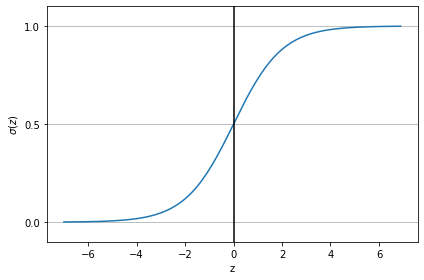

In [2]:
# Plottting a sigmoid function

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

plt.yticks([0.0,0.5,1.0])

ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

#### Classification with Logistic Regression

The sigmoid function gives us a way to take an instance $x$ and compute the probability $P(y=1|x)$.

How do we make decision about which class to apply to a test instance *x*? For a given *x*, we say yes if the probability $P(y=1|x)$ is more than 0.5, and no otherwise. We call 0.5 the **decision boundry**: <br/>
$
decision(x) = \begin{cases}
  1, & \text{if } P(y=1 |x) > 0.5, \\
  0, & \text{otherwise}.
\end{cases}
$

#### Learning in Logistic Regression

Logistic regression is an instance of supervised classification in which we know the correct label $y$ (either 0 or 1) for each observation $x$. What the system produces using the sigmoid fucntion ($\sigma (x)$) is $\hat y$, the system's estimate of the true $y$.  We want to learn the parameters $w$ and $b$ that makes $\hat y$ for each training observation as close as possible to the true y. 

This requires two components. The first metric for how close the current label ($\hat y$) is to the true label $y$. We take the distance between the system output and the true output. We call this the **loss** function or the **cost** function. 

The second thing that we need is an optimization algorithm for iteratively updating the weights so as to minimize the loss function. The standard algorith for this is **gradient descent**. 


#### The cross-entropy loss function

The cost function for logistic regression is shown below: <br/>

$J(w) = \frac{1}{n} \sum_{i=1} ^ {n} [-y^{(i)}log(\sigma (z^{(i)})) - (1 - y^{(i)})log(1 - \sigma(z^{(i)}))]$

To get a better grasp of this cost functin, let's take a look at the cost that we calculate for one single training example: <br/>
$ J(\sigma (z), y; w) = -y^{(i)}log(\sigma (z^{(i)})) - (1 - y^{(i)})log(1 - \sigma(z^{(i)})) $ <br/>

Looking at the equation, we can see that the first term becomes zero if y=0, and the second term becomes zero if y=1. <br/>
$
J(\sigma (z), y; w) = \begin{cases}
  -log(\sigma (z)), & \text{if y = 1} P(y=1 |x) > 0.5, \\
  -log(1-\sigma (z)), & \text{if y = 0}.
\end{cases}
$
<br/>



### Updating the weights

Since we update all weights simultaneously, we can write the general update rule as:

$w := w + \Delta w$ <br/>

We define $\delta w$ as follows:

$ \Delta w = \eta \nabla J(w)$ <br/>

We can write the gradient descent update rule as follows: <br/>

$\Delta w_j = - \eta \frac{\delta J}{\delta w_j} = \eta \sum_{i=1}^{n} (y_{(i)} - \phi (z^{(i)}))x_j ^{(i)}$
<br/>

This is equal to the gradient descent rule for Adaline.


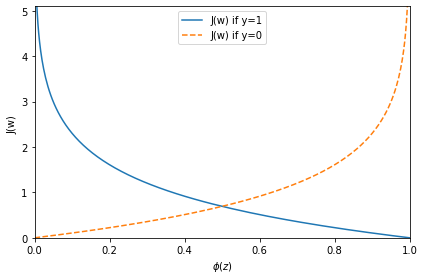

In [18]:
## Illustrating the cost of classifying for a single training example
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0,1])
plt.xlabel('$\phi (z)$')
plt.ylabel('J(w) ')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [4]:

import pandas as pd
import matplotlib.pyplot as plt



In [5]:
import numpy as np
from numpy import ndarray, float64


class LogisticRegression(object):
    def __init__(
        self, learning_rate: float = 0.01, n_iter: int = 50, random_state: int = 1
    ):
        """Initialize the object

        Args:
            learning_rate (float, optional): Learning rate. Defaults to 0.01.
            n_iter (int, optional): Passes over the training dataset. Defaults to 50.
            random_state (int, optional): Random number generator seed. Defaults to 1.
        """
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X: ndarray, y: ndarray):
        """Fit the training data

        Args:
            X (ndarray): shape [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and
            n_featutes is the number of features
            y (ndarray): shape [n_examples]
            Target values

        Returns:
            LogisticRegression : object
        """

        rgen = np.random.RandomState(self.random_state)
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.sigmoid(net_input)
            errors = y - output
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            # we compute the logistic cost function
            cost = (-y.dot(np.log(output))-(1-y).dot(np.log(1-output)))
            self.cost_.append(cost)

        return self

    def net_input(self, X: ndarray) -> float64:
        """Calculate the net input

        Args:
            X (ndarray): Input vectors

        Returns:
            float64: Net input
        """
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def sigmoid(self, z):
        """Compute sigmoid"""
        return 1. / (1. + np.exp(-z))

    def predict(self, X: ndarray) -> ndarray:
        """Predict the label

        Args:
            X (ndarray): Input vectors

        Returns:
            ndarray: Label
        """
        return np.where(self.sigmoid(self.net_input(X)) >= 0.5, 1, 0)


In [6]:
# Loading the data
import pandas as pd
import numpy as np
import os

filepath = os.path.join('../data', 'iris.data')
df = pd.read_csv(filepath, header=None, encoding='utf-8') 

In [7]:
## Select the first 100 data
labels = df.iloc[0:100, 4].values
labels = np.where(labels == 'Iris-setosa', 0, 1)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
features = df.iloc[0:100, [0,2]].values
features

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

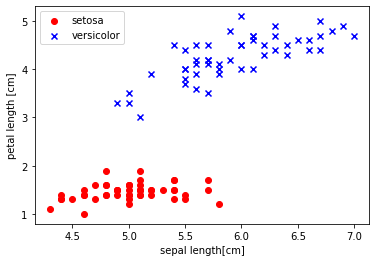

In [9]:
import matplotlib.pyplot as plt
plt.scatter(features[:50, 0], features[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(features[50:100, 0], features[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=0, train_size = .75)

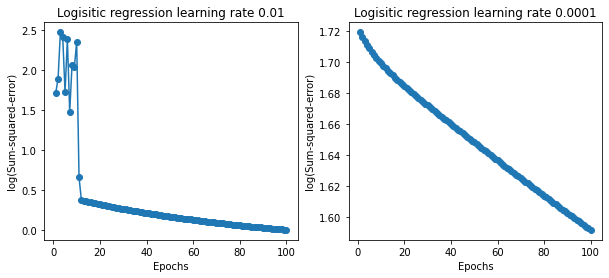

In [11]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

lr1 = LogisticRegression(learning_rate=0.01, n_iter=100).fit(X_train, y_train)

ax[0].plot(range(1, len(lr1.cost_) + 1), np.log10(lr1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Logisitic regression learning rate 0.01')

lr2 = LogisticRegression(learning_rate=0.0001, n_iter=100).fit(X_train, y_train)

ax[1].plot(range(1, len(lr2.cost_) + 1), np.log10(lr2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Logisitic regression learning rate 0.0001')


plt.show()

<AxesSubplot:>

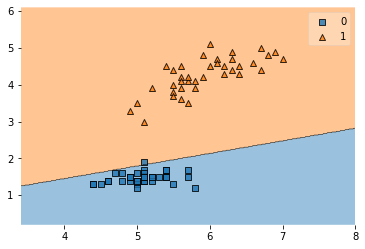

In [16]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, clf=lr2)

In [13]:
def accuracy_metric(trained_model, test_features, test_labels):
    correct_predictions = 0
    total_predictions = len(test_labels)
    for X, label in zip(test_features, test_labels):
        predicted_label = trained_model.predict(X)
        if label == predicted_label:
            correct_predictions += 1
    
    accuracy = (correct_predictions/total_predictions) * 100
    return accuracy

In [14]:
accuracy = accuracy_metric(lr2, X_test, y_test)
print(f"Accuracy = {accuracy}")

Accuracy = 96.0


In [15]:
#### Training Logisitc Regression Model using scikit-learn

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train, y_train)


LogisticRegression(C=100.0, multi_class='ovr', random_state=1)